C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000026002FAD490>.

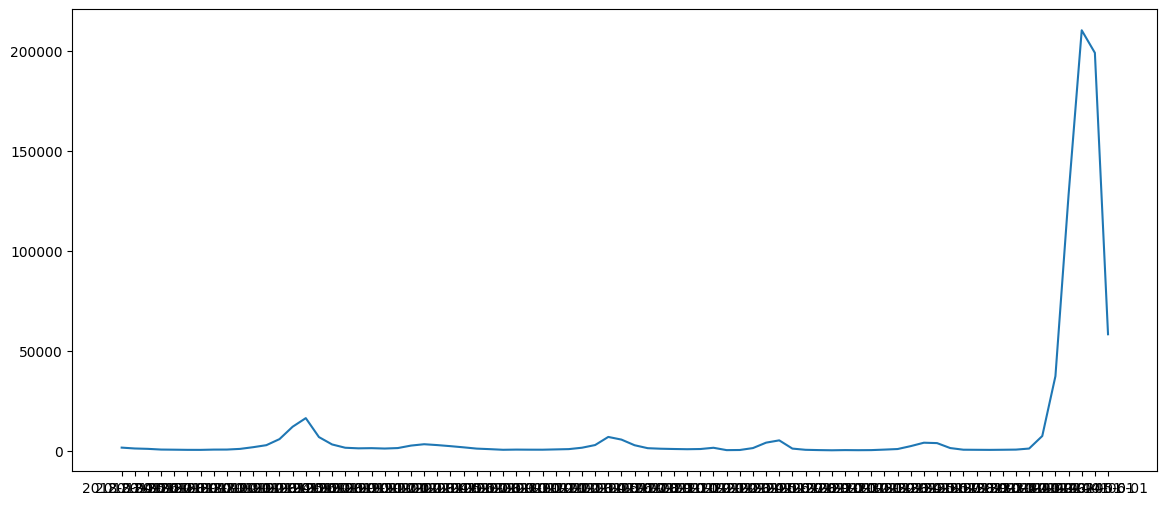

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Carregar o dataset
file_path = '..\\..\\Dataset\\testes\\dataset_casos_mensais_publicacao.csv'
dengue_data = pd.read_csv(file_path)

# Preparação dos dados: filtrando o município de São Paulo (código: 355030)
municipio_sp_code = 355030

# Converter 'dt_notificacao' para o formato datetime
#dengue_data['dt_notificacao'] = pd.to_datetime(dengue_data['dt_notificacao'])

# Separar o dataset: um para São Paulo e outro para todos os municípios
sp_data = dengue_data[dengue_data['cd_municipio'] == municipio_sp_code]
#all_municipios_data = dengue_data.copy()

# Agregação dos dados para série temporal mensal para São Paulo (soma dos casos, média da temperatura)
sp_data_grouped = sp_data.groupby('dt_notificacao').agg({
    'qntd_casos': 'sum',
    'temp_media_mensal': 'mean'
}).dropna()

# Agregação dos dados para série temporal mensal para todos os municípios (soma dos casos, média da temperatura)
#all_municipios_grouped = all_municipios_data.groupby('dt_notificacao').agg({
#    'qntd_casos': 'sum',
#    'temp_media_mensal': 'mean'
#}).dropna()

# Modelo ARIMA para São Paulo
sp_model = ARIMA(sp_data_grouped['qntd_casos'], order=(60, 1, 0))
sp_fit = sp_model.fit()

# Modelo ARIMA para todos os municípios
#all_model = ARIMA(all_municipios_grouped['qntd_casos'], order=(60, 1, 0))
#all_fit = all_model.fit()

# Previsão para os próximos 12 meses
sp_forecast = sp_fit.forecast(steps=12)
#all_forecast = all_fit.forecast(steps=12)

# Plotando os resultados
plt.figure(figsize=(14, 6))
plt.plot(sp_data_grouped.index, sp_data_grouped['qntd_casos'], label='São Paulo Actual')
#plt.plot(all_municipios_grouped.index, all_municipios_grouped['qntd_casos'], label='All Municipalities Actual', alpha=0.6)
plt.plot(pd.date_range(sp_data_grouped.index[-1], periods=12, freq='M'), sp_forecast, label='São Paulo Forecast', linestyle='--')
#plt.plot(pd.date_range(all_municipios_grouped.index[-1], periods=12, freq='M'), all_forecast, label='All Municipalities Forecast', linestyle='--', alpha=0.6)
plt.title('ARIMA Forecasting of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid()
plt.show()
